In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
trainDf = pd.read_csv('data/train.csv')
testDF = pd.read_csv('data/test.csv')

In [3]:
trainDf['target'].value_counts() / trainDf['target'].size

1    0.761199
0    0.238801
Name: target, dtype: float64

In [4]:
#Doing something for exploratory analysis
train = trainDf.drop('ID', axis=1)
test = testDF.drop('ID', axis=1)
target = train['target']
featurenames = train.columns.values

In [5]:
# Function to convert to hexavigesimal base
def az_to_int(az,nanVal=None):
    if az==az:  #catch NaN
        hv = 0
        for i in range(len(az)):
            hv += (ord(az[i].lower())-ord('a')+1)*26**(len(az)-1-i)
        return hv
    else:
        if nanVal is not None:
            return nanVal
        else:
            return az

In [6]:
# Prepare the data: combine, process, split
test['target'] = -999
all_data = train.append(test)

In [7]:
# convert v22 to hexavigesimal
all_data.v22 = all_data.v22.apply(az_to_int)

In [8]:
for i in all_data.columns.values:
    if(all_data[i].dtypes=='object'):
        print(i)

v107
v110
v112
v113
v125
v24
v3
v30
v31
v47
v52
v56
v66
v71
v74
v75
v79
v91


In [9]:
all_data['v91'].value_counts()

A    54026
G    49223
C    46327
B    45274
F    27035
E     6375
D      449
Name: v91, dtype: int64

In [10]:
for i in all_data.columns.values:
    if(all_data[i].dtypes=='object'):
        all_data[i], tmpItter = all_data[i].factorize()

In [14]:
all_data[i].factorize()

(array([     0,     -1,      1, ..., 128999,     -1, 129000]),
 Float64Index([ 1.19133666077, 0.841836966067,  1.33461123453,  1.30188069862,
               0.720974170348,  1.17986754747,  1.27337576606,  1.82373426802,
                1.00823009672,  1.42176780136,
               ...
                1.36827475069,  1.72607711513,  1.48314539475,  1.10022406074,
               0.886738893821, 0.833051420588,  1.42394808409,  1.80046740701,
                1.90084026718, 0.485651921055],
              dtype='float64', length=129001))

In [12]:
all_data['v91']

0         0
1         1
2         2
3         1
4         2
5         2
6         1
7         0
8         3
9         0
10        4
11        0
12        2
13        2
14        2
15        0
16        3
17        0
18        1
19        2
20        0
21        1
22        4
23        3
24        1
25        4
26        2
27        4
28        5
29        3
         ..
114363    3
114364    2
114365    3
114366    0
114367    3
114368    1
114369    3
114370    4
114371    1
114372    2
114373    3
114374    1
114375    3
114376    0
114377    4
114378    3
114379    2
114380    0
114381    6
114382    0
114383    4
114384    3
114385    4
114386    4
114387    2
114388    1
114389    3
114390    4
114391    2
114392    4
Name: v91, dtype: int32

In [15]:
# replace all NA's with -1
all_data.fillna(-1, inplace=True)

# split the data
train = all_data[all_data['target']>-999]
test = all_data[all_data['target']==-999]
test = test.drop(['target'],axis=1)

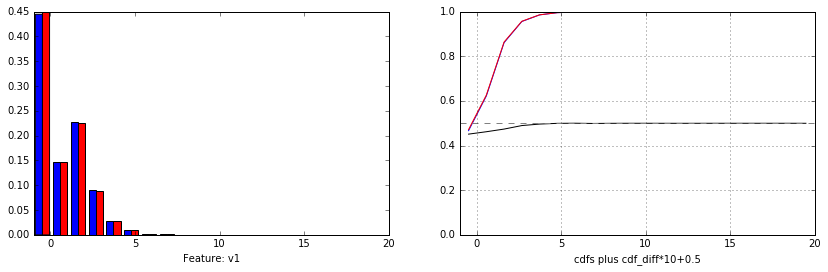

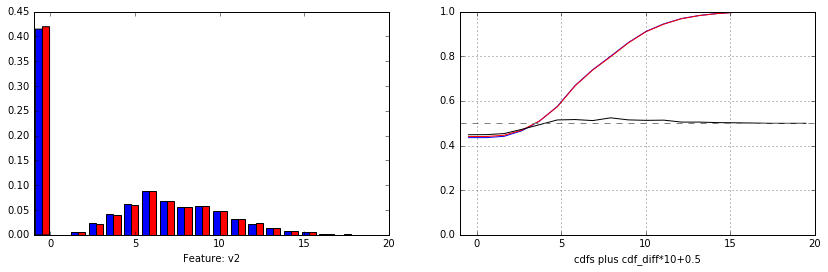

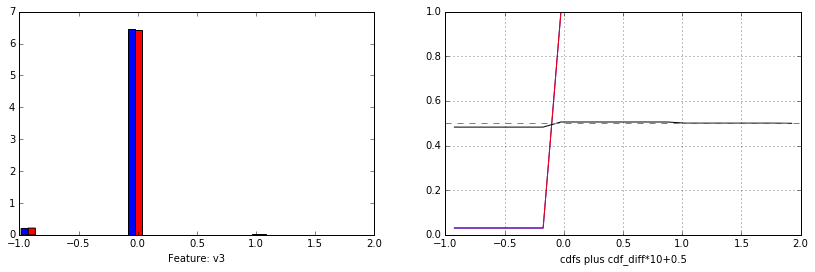

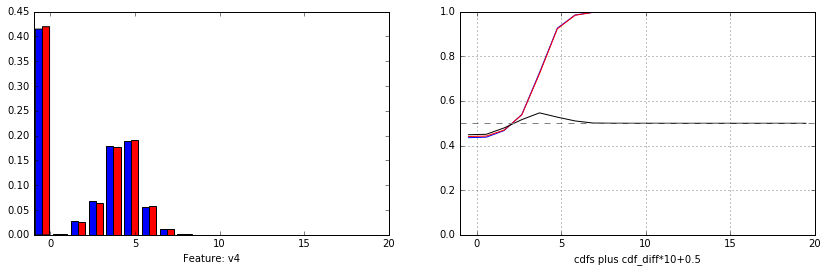

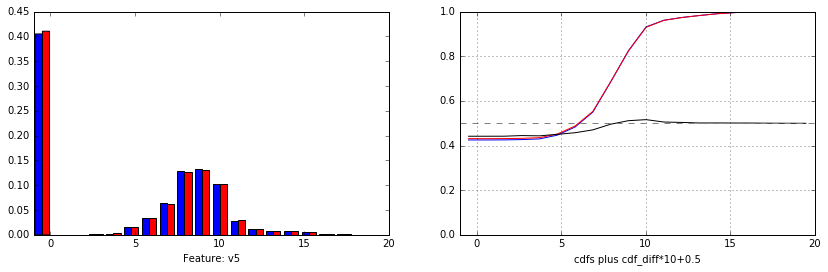

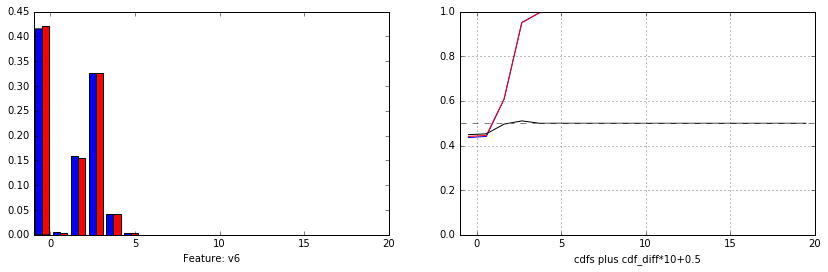

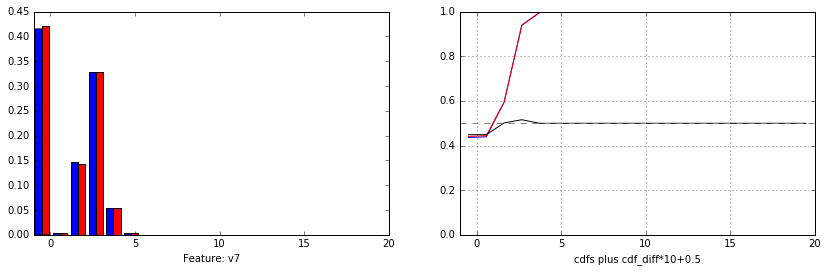

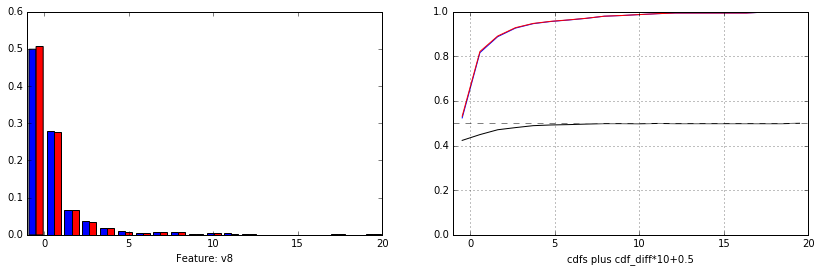

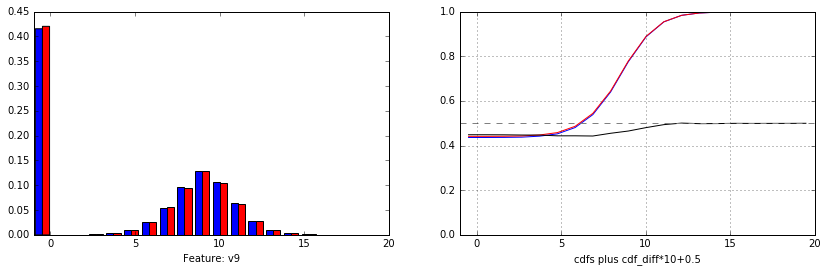

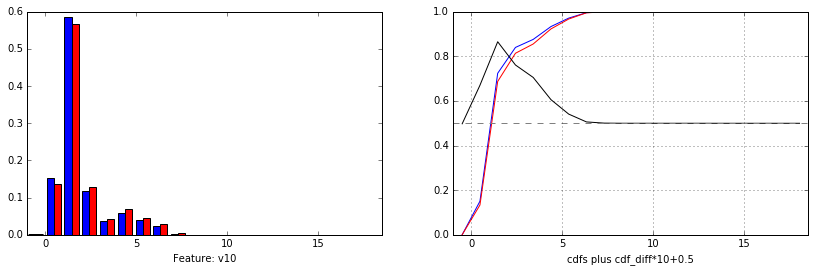

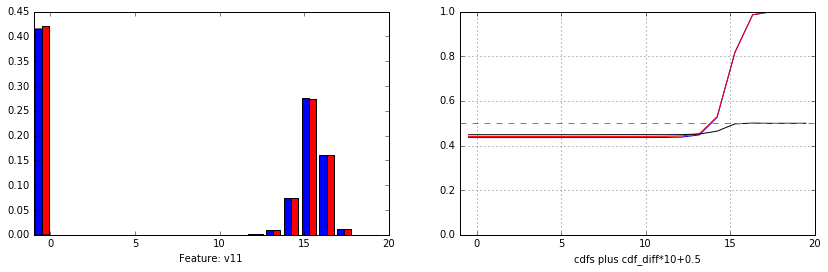

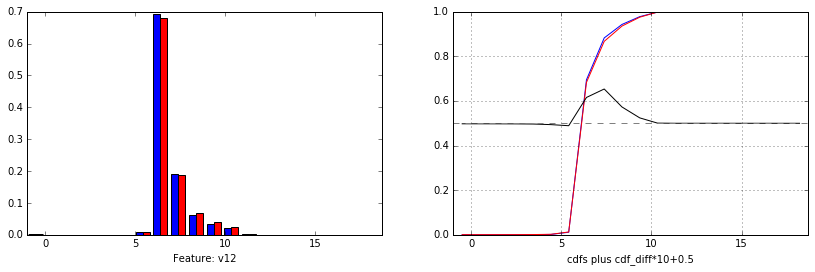

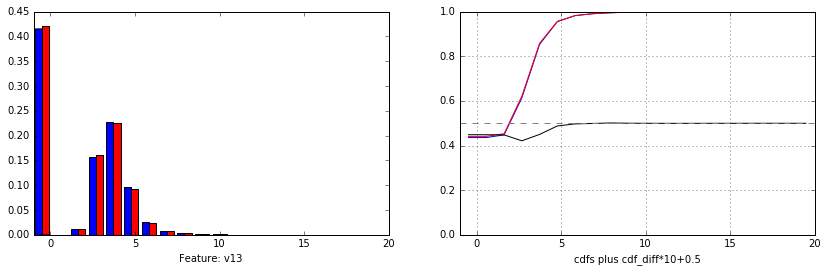

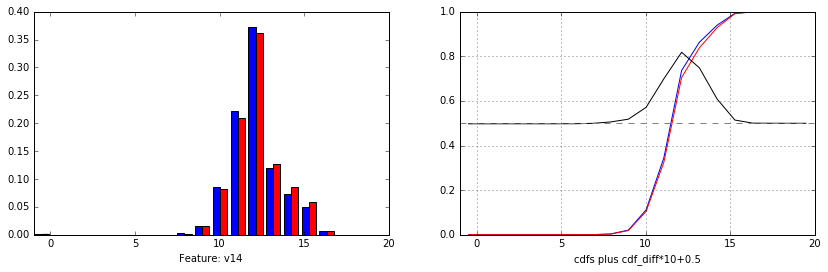

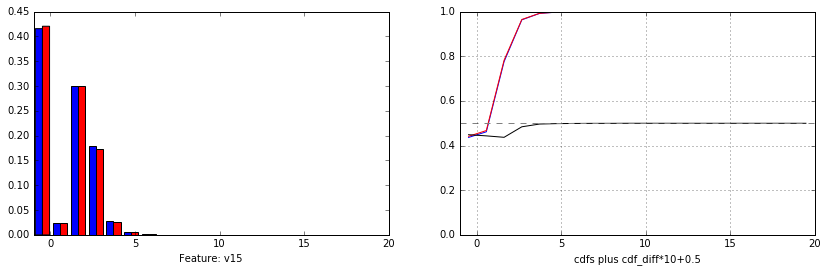

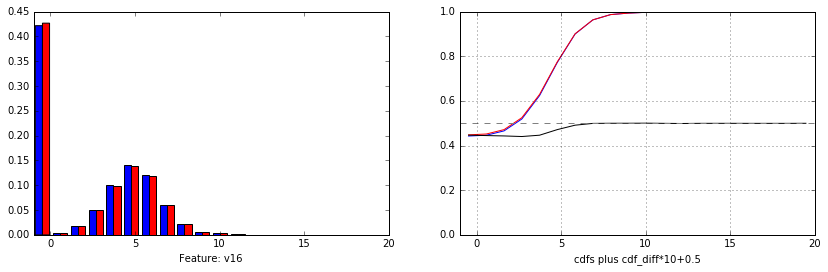

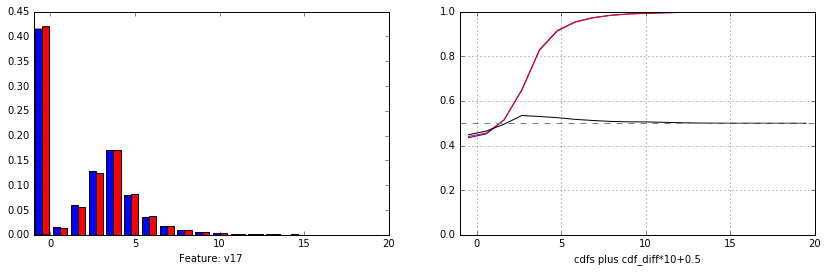

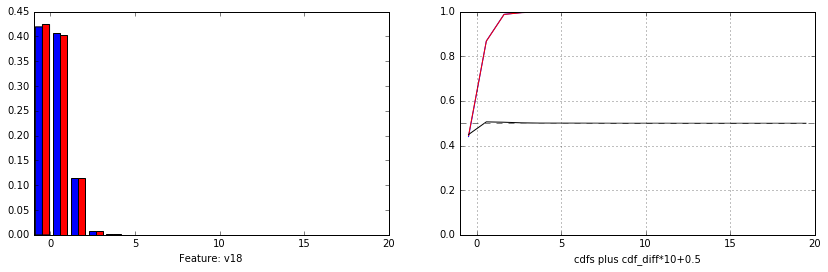

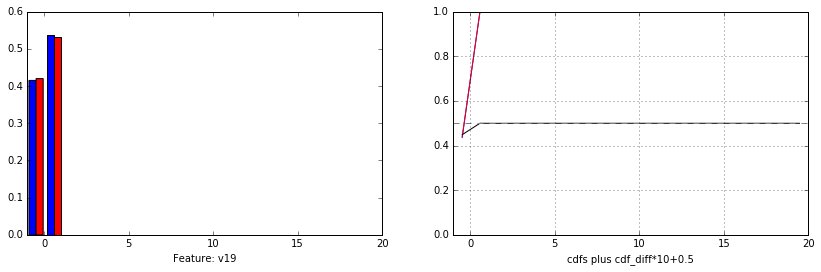

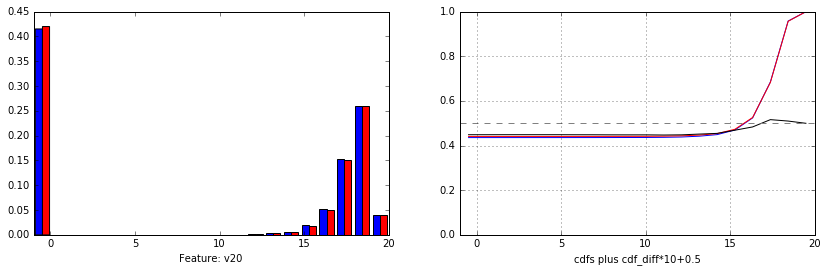

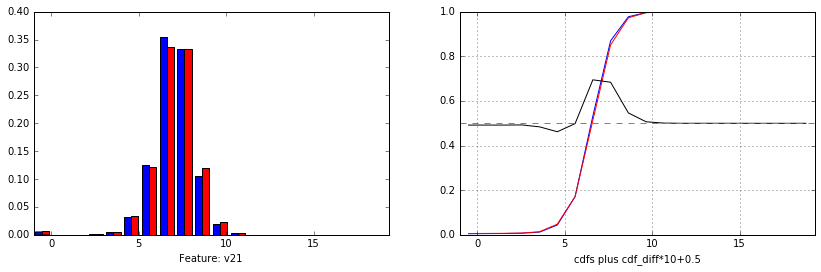

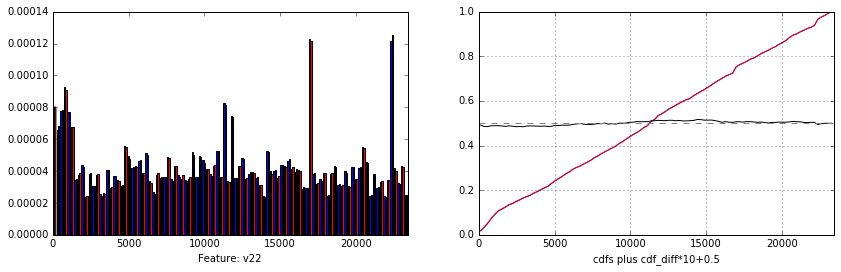

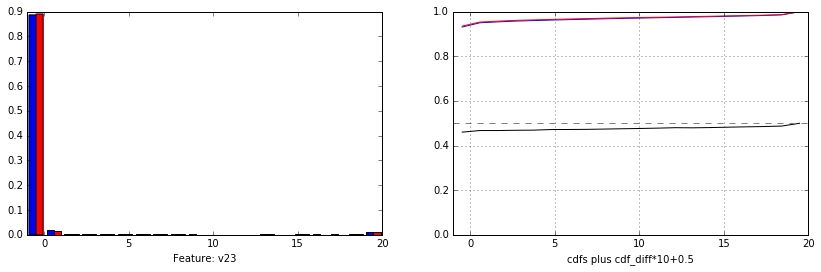

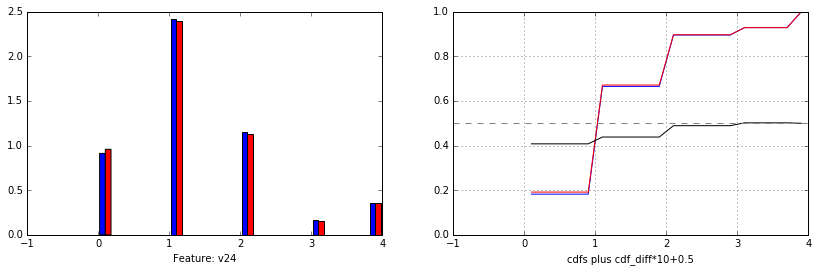

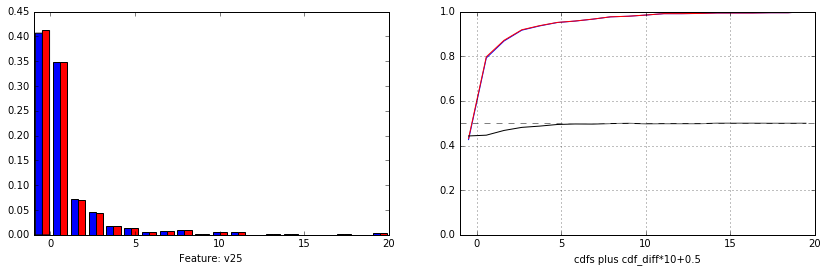

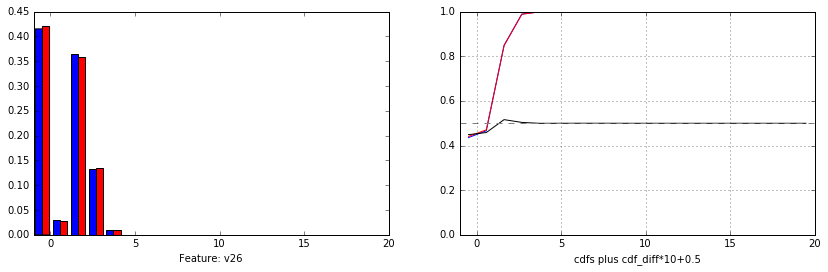

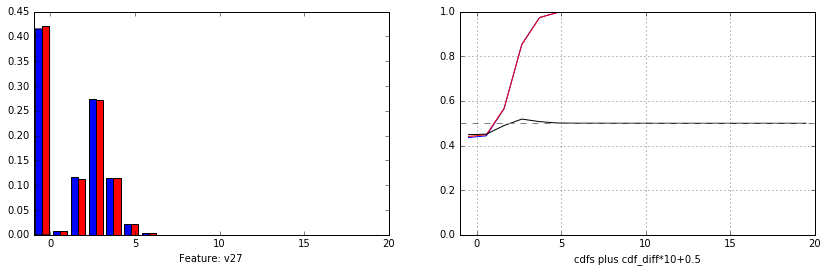

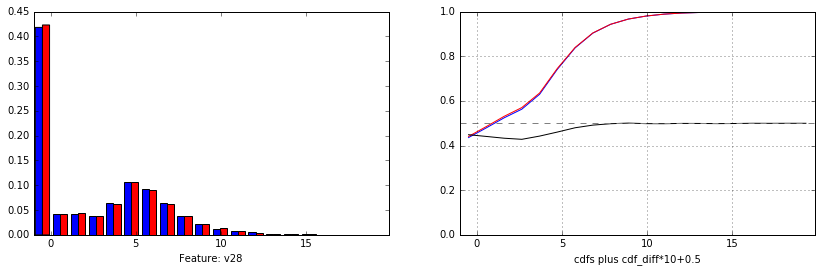

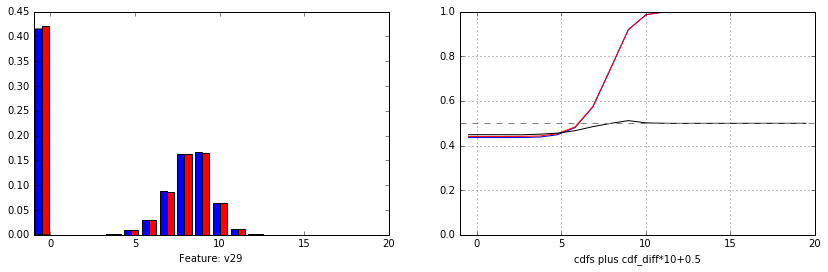

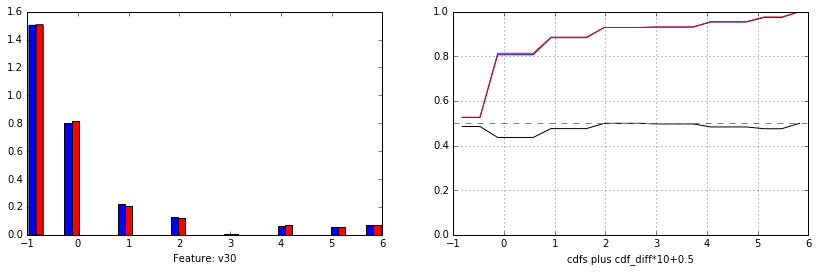

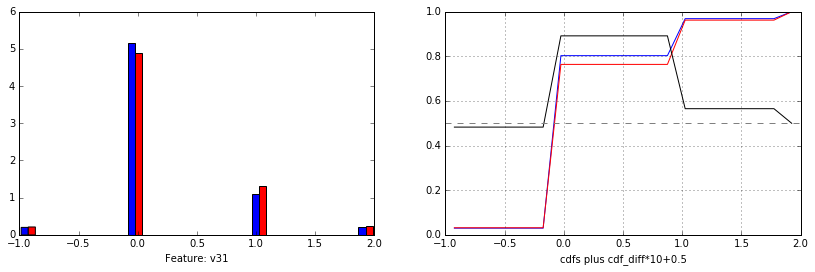

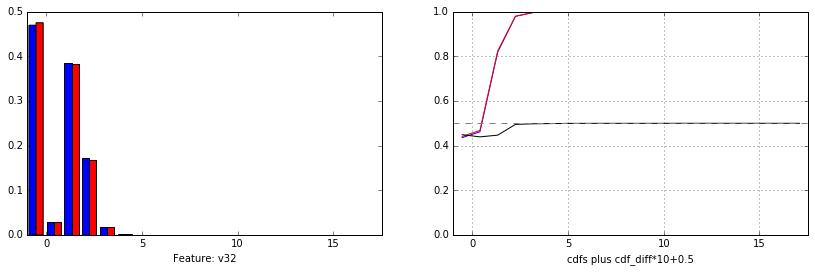

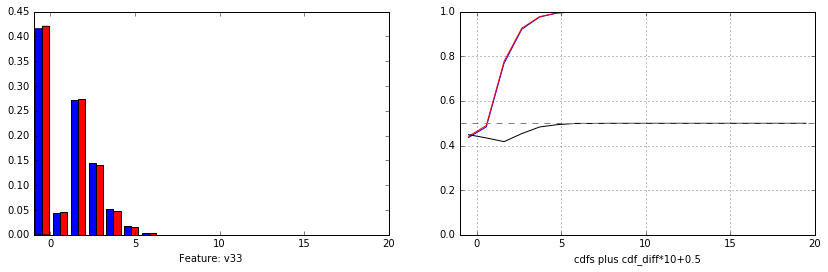

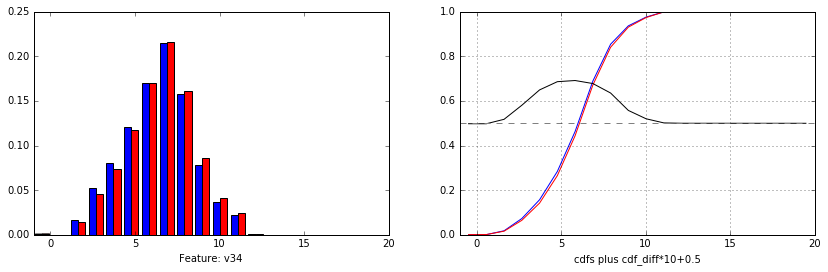

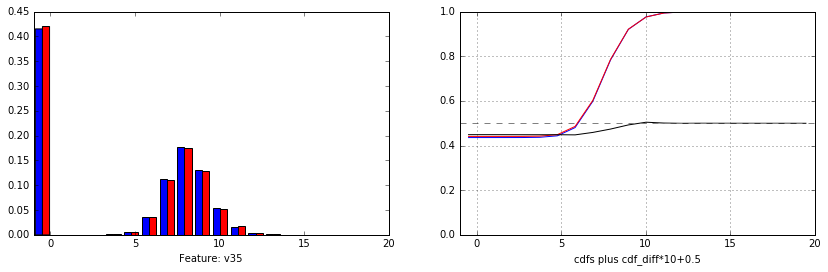

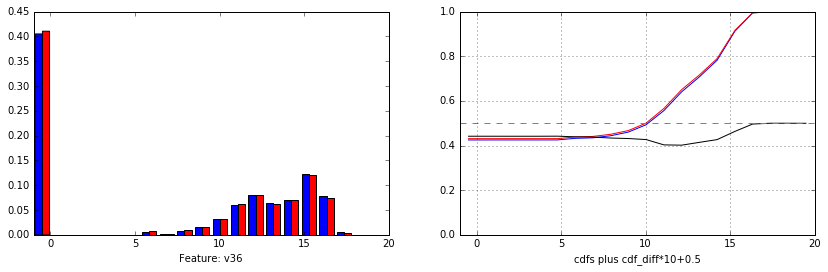

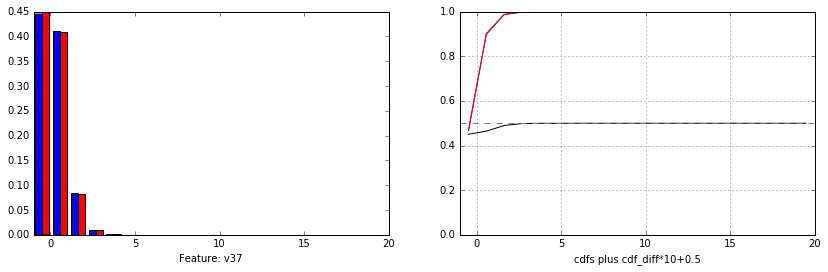

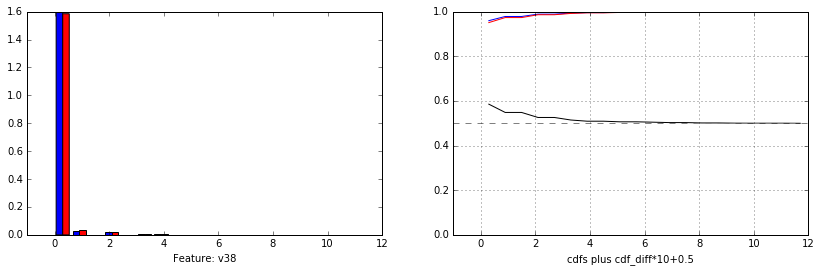

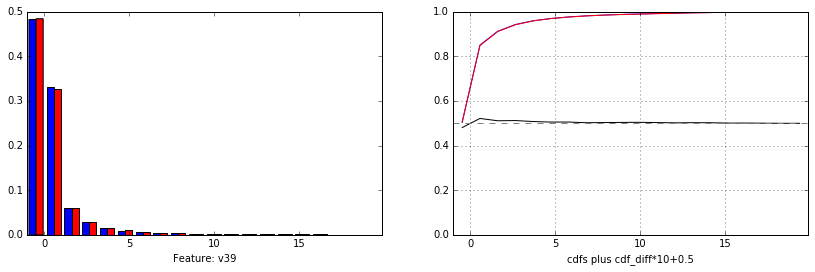

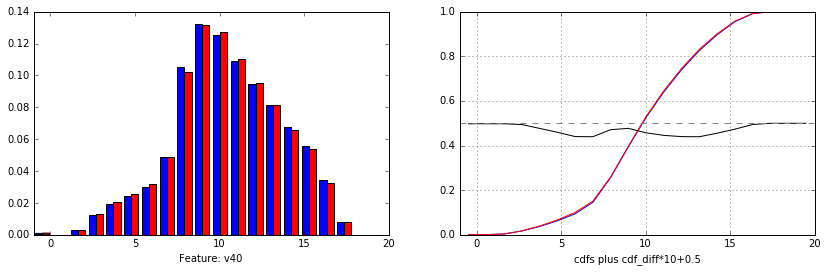

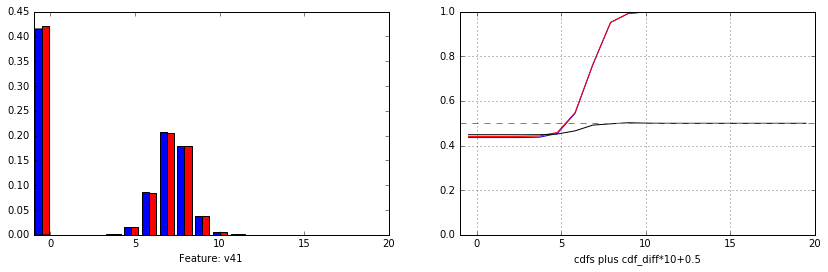

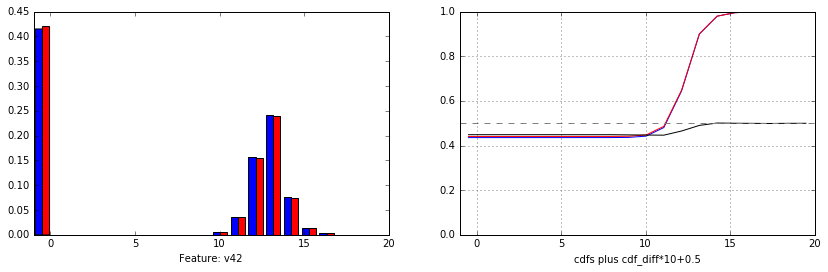

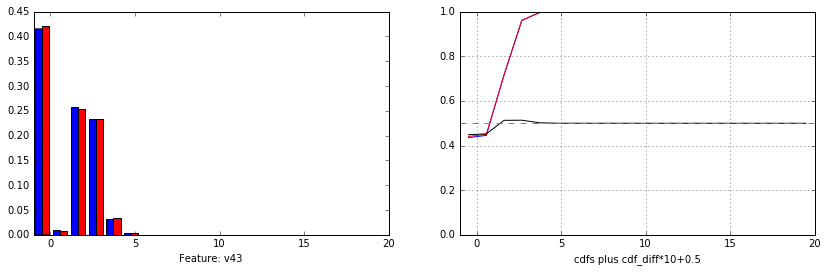

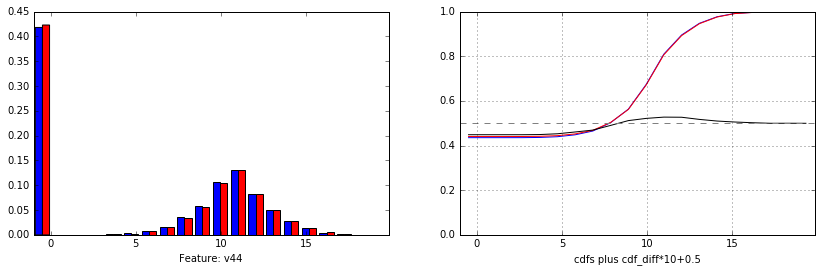

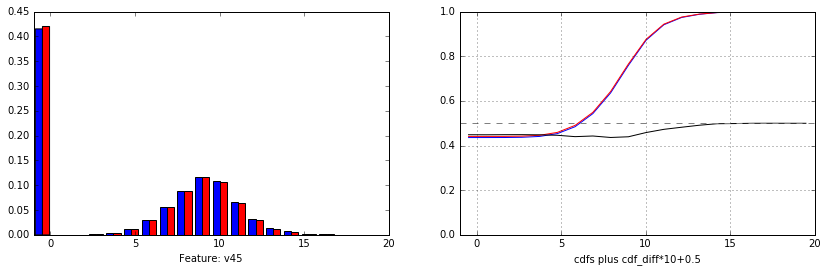

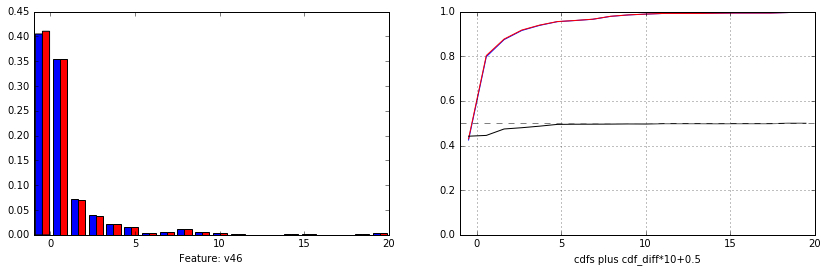

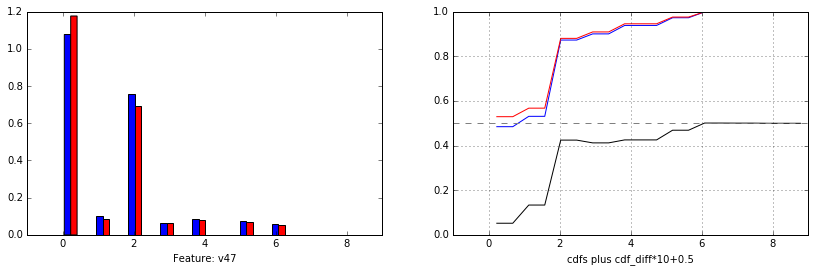

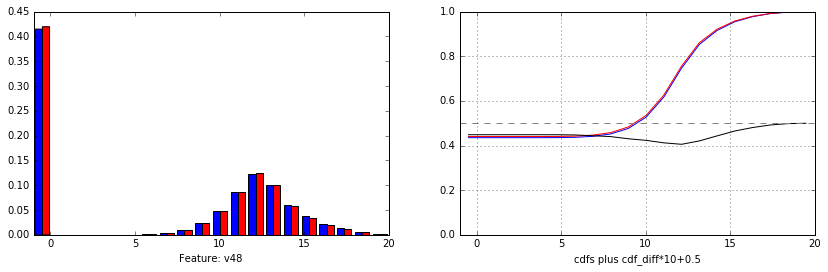

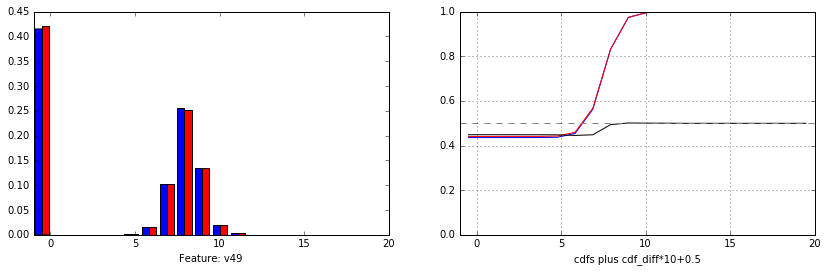

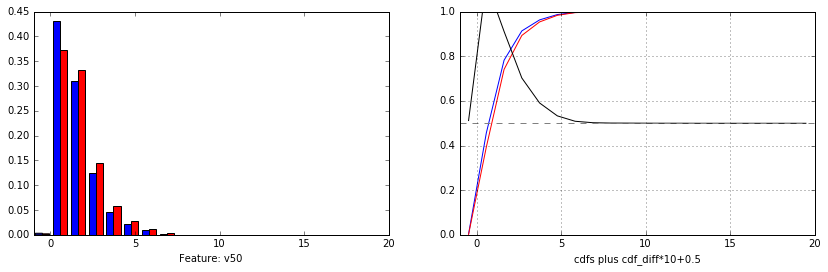

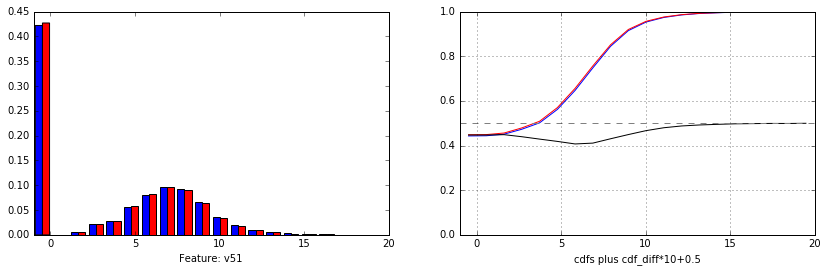

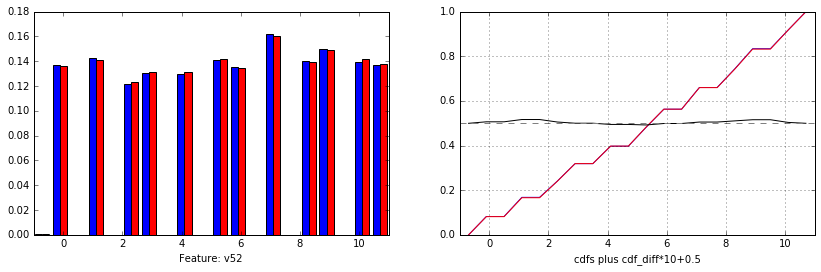

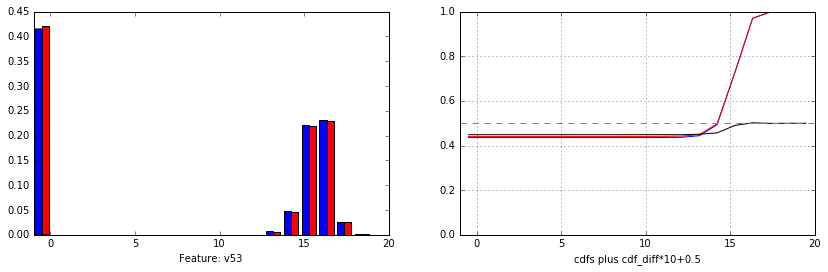

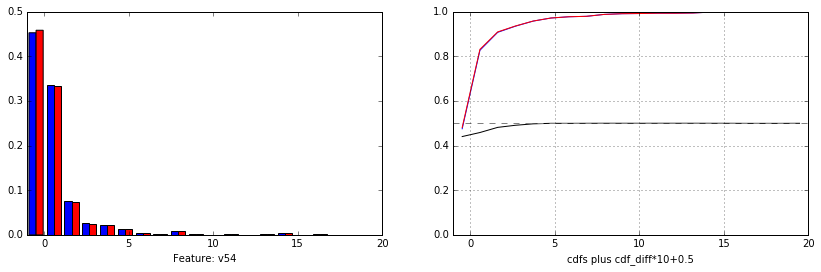

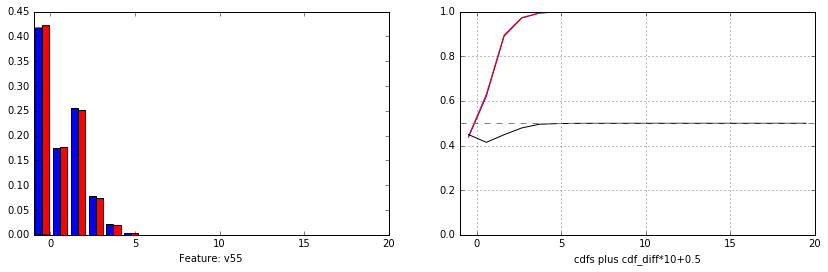

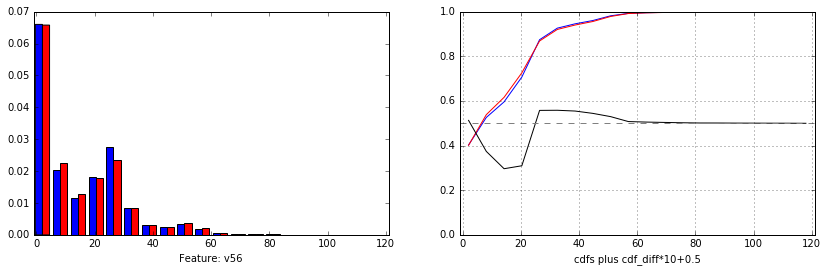

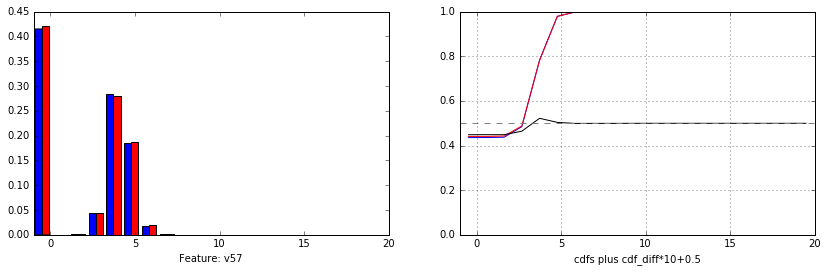

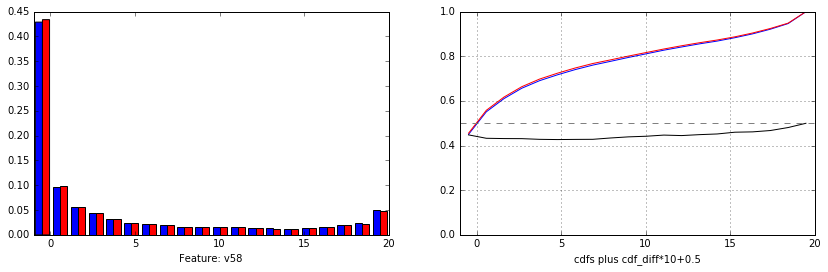

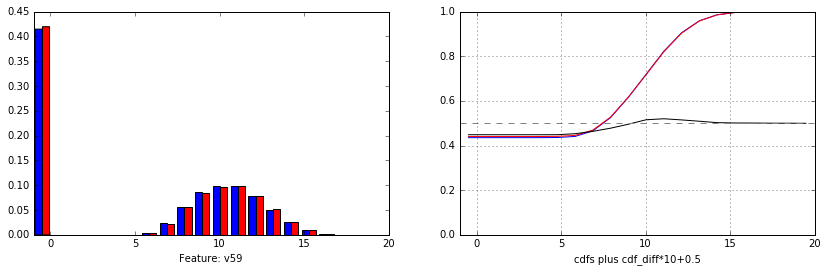

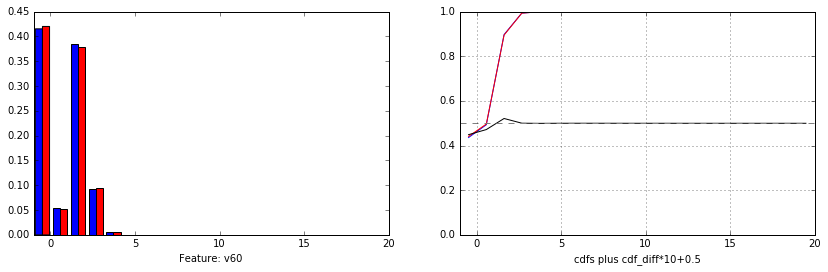

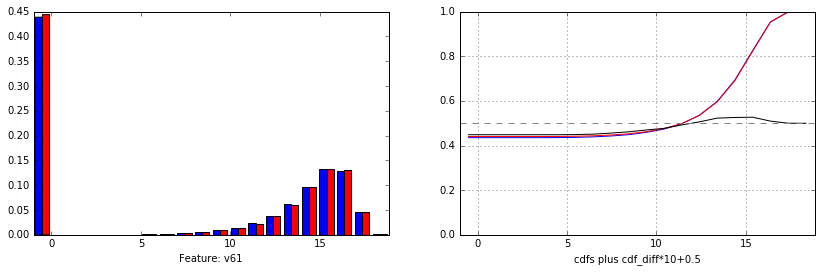

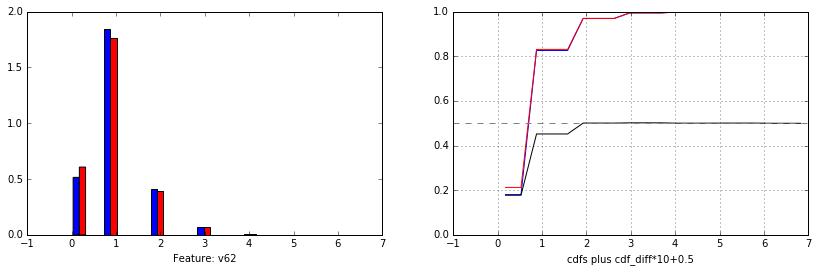

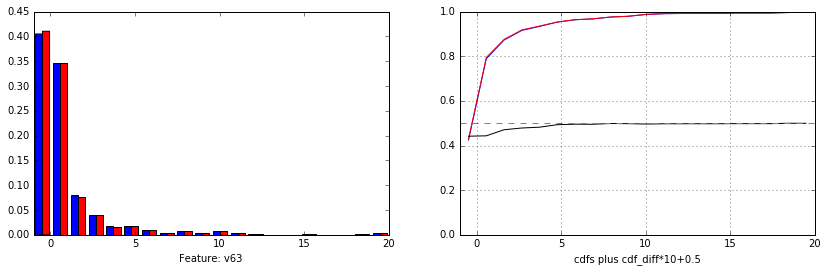

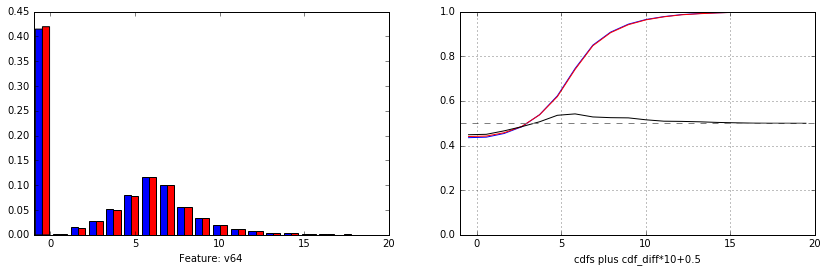

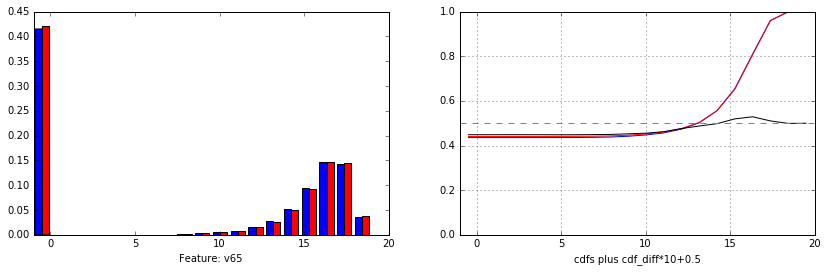

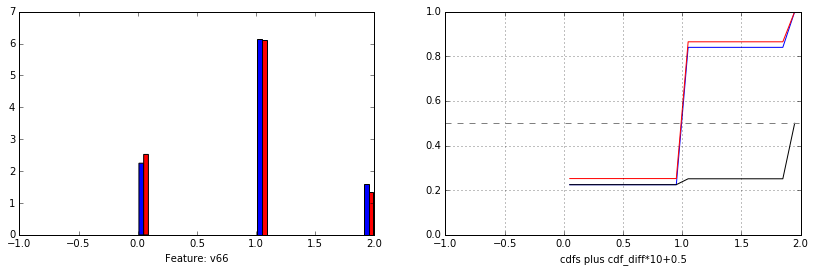

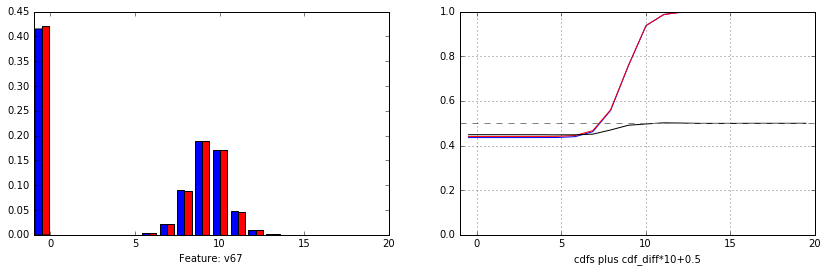

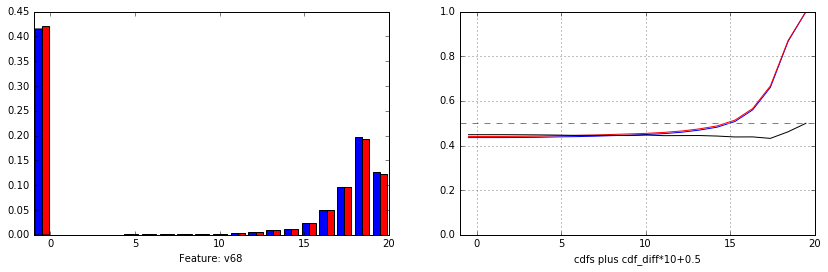

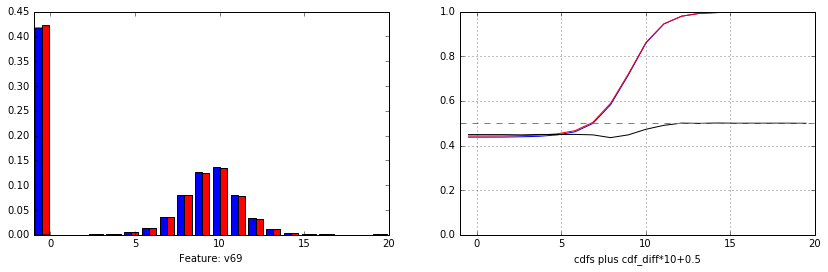

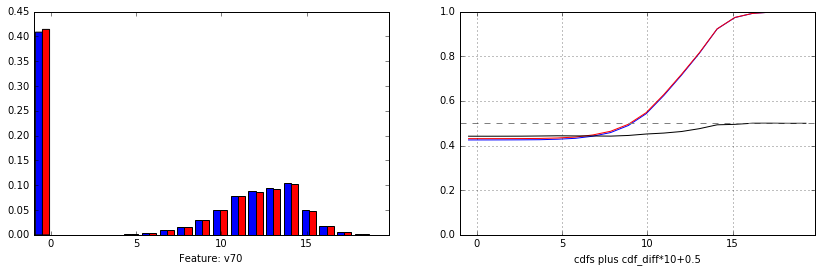

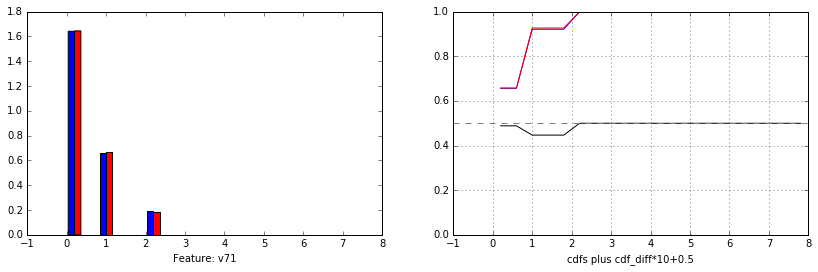

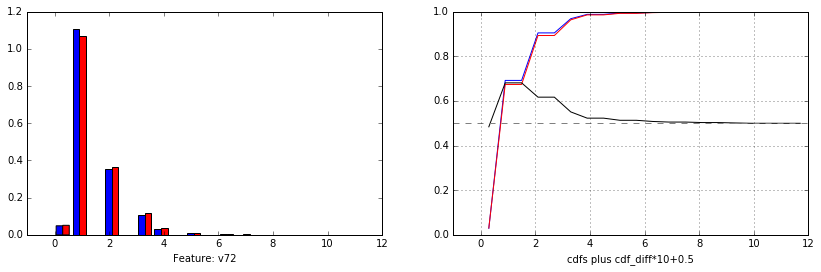

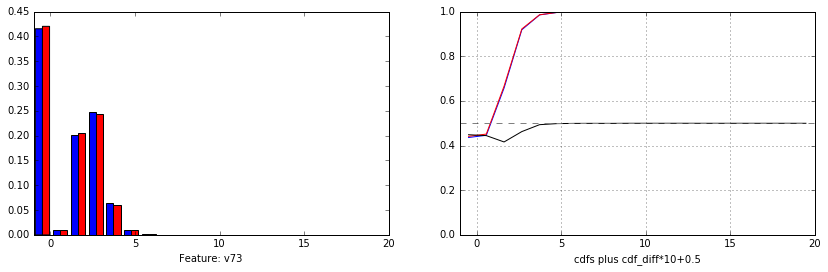

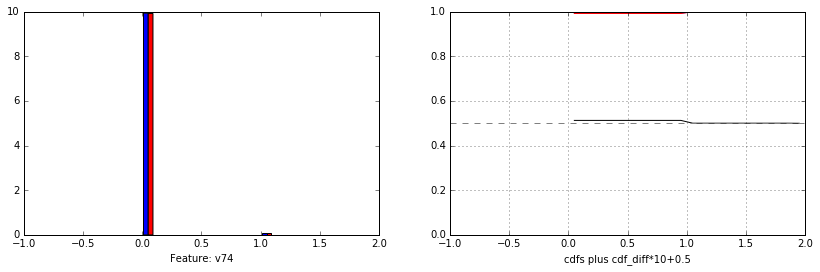

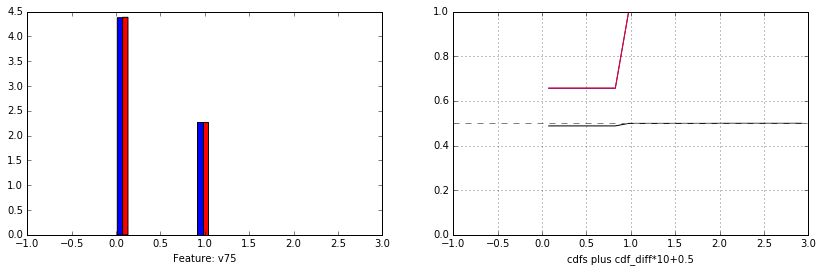

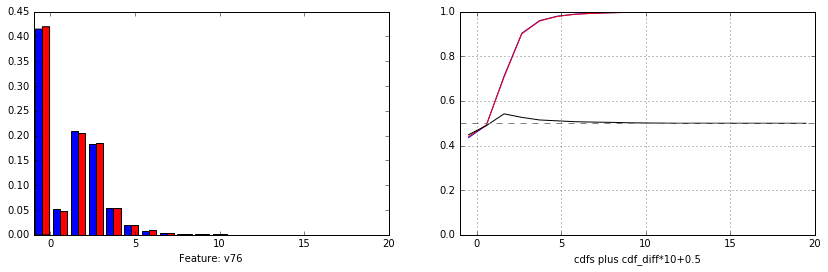

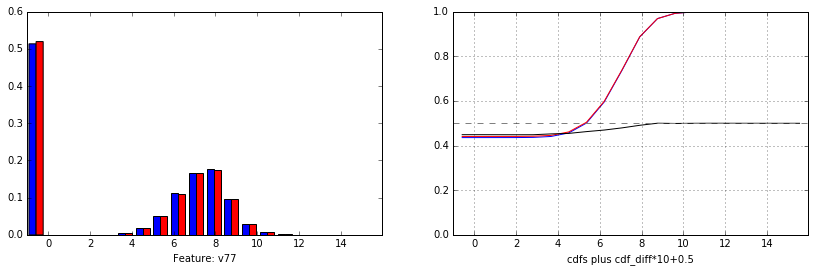

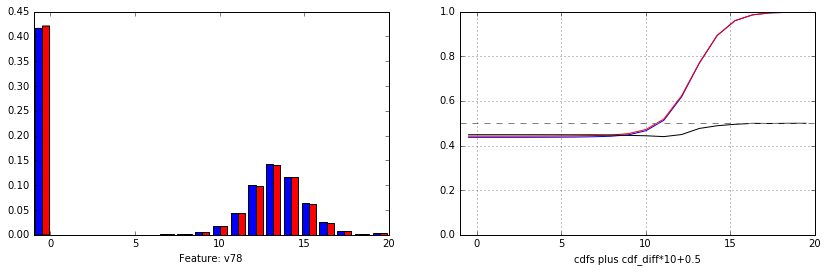

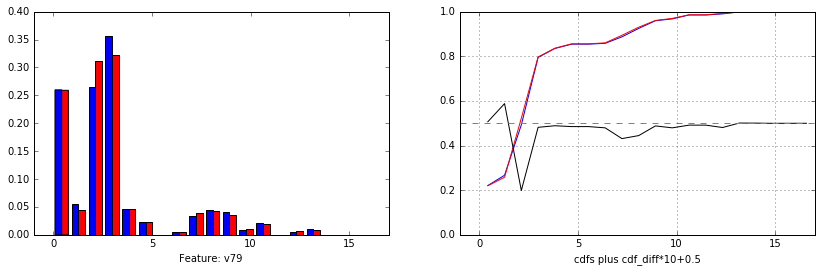

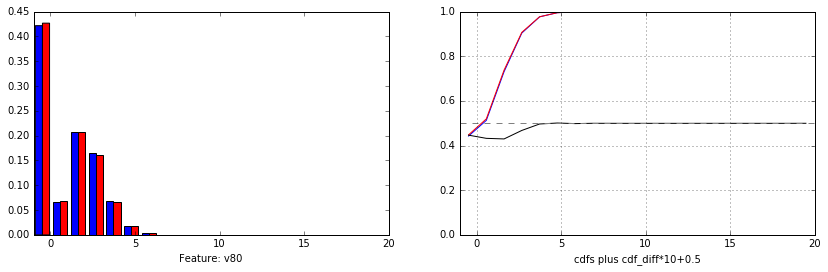

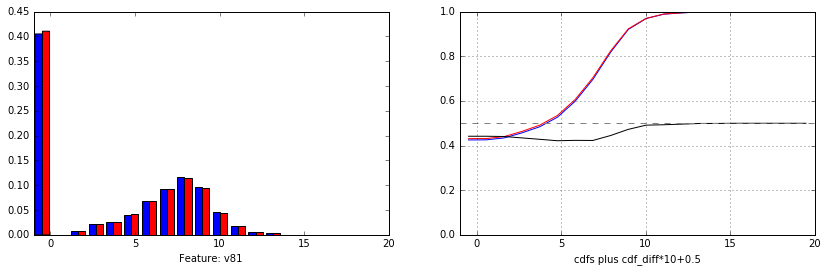

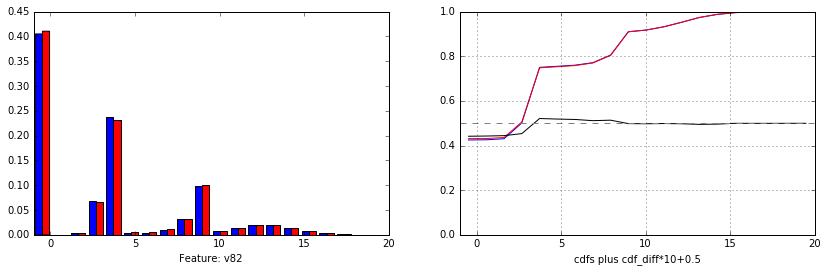

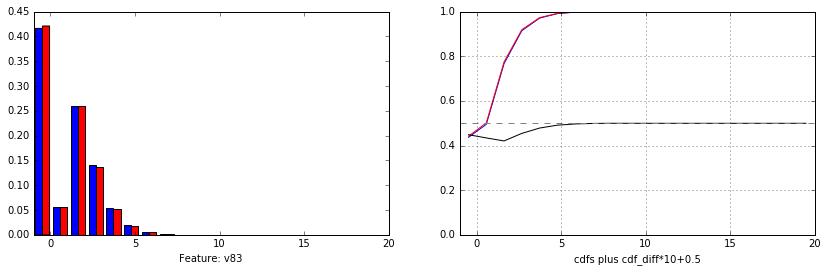

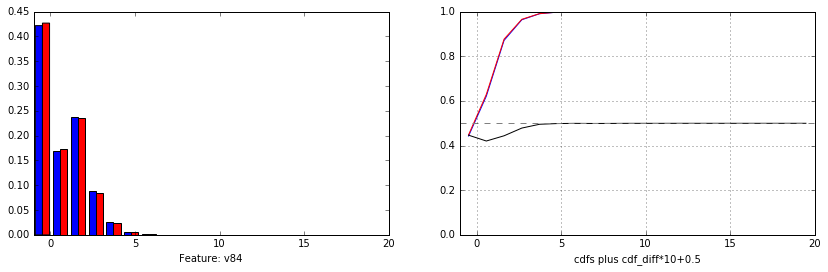

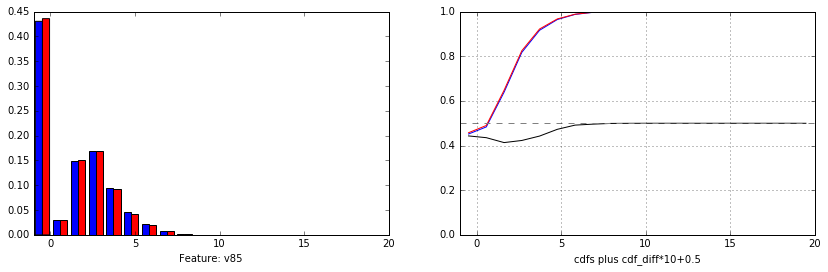

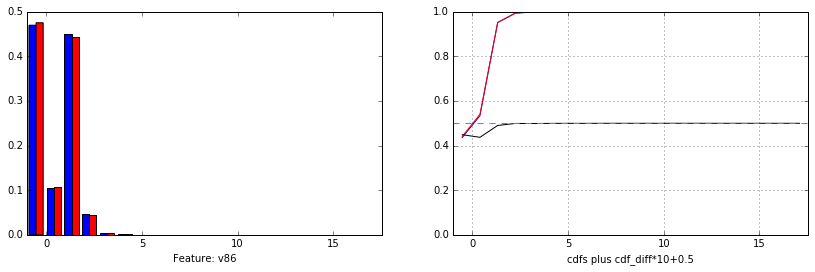

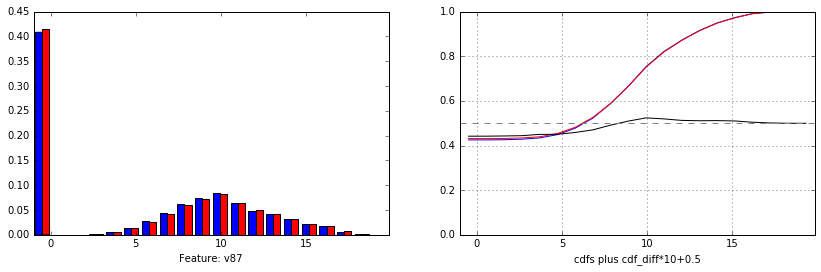

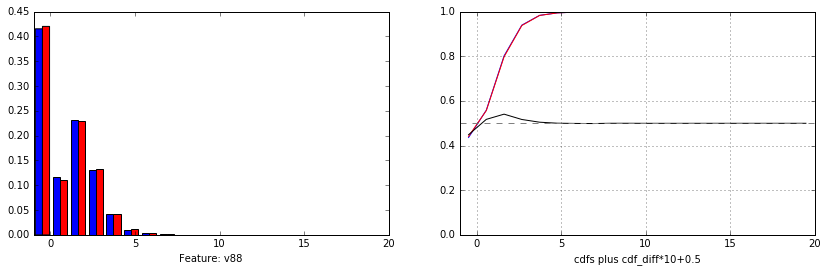

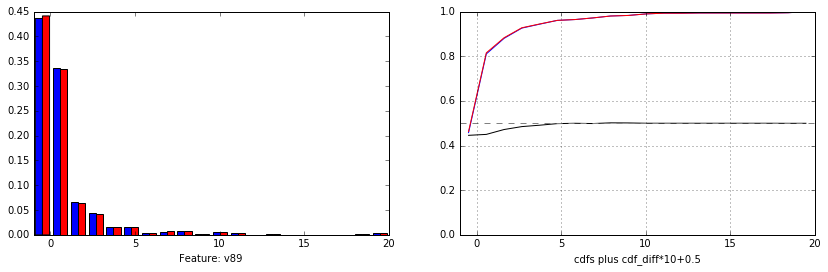

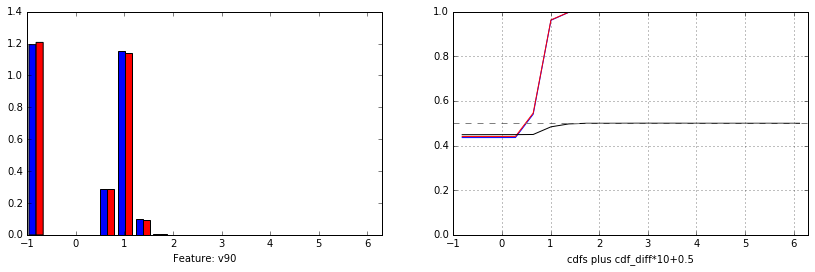

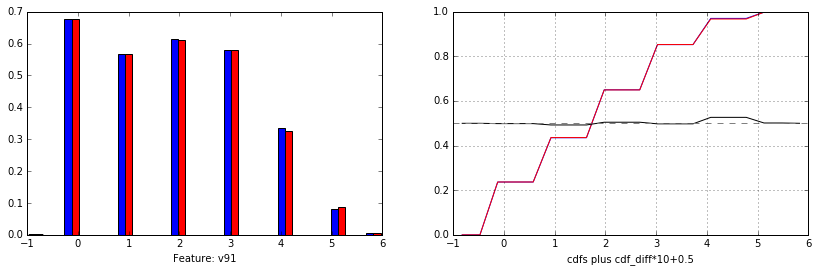

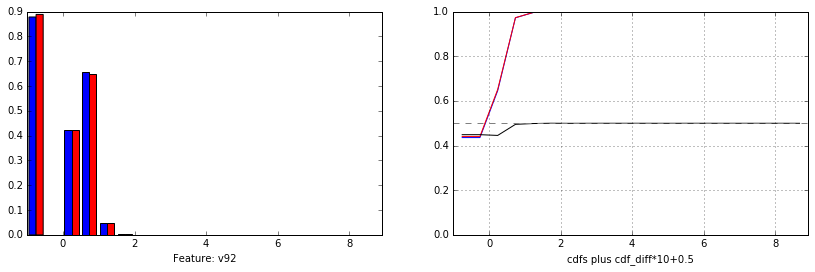

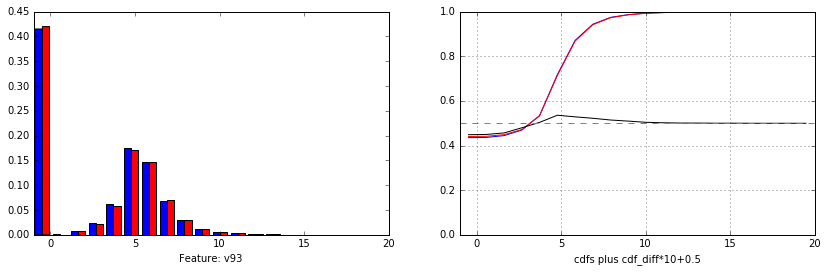

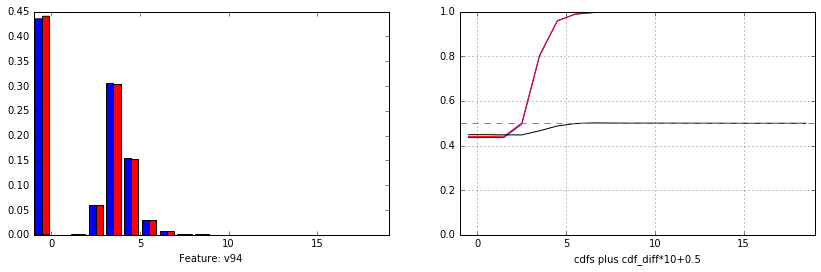

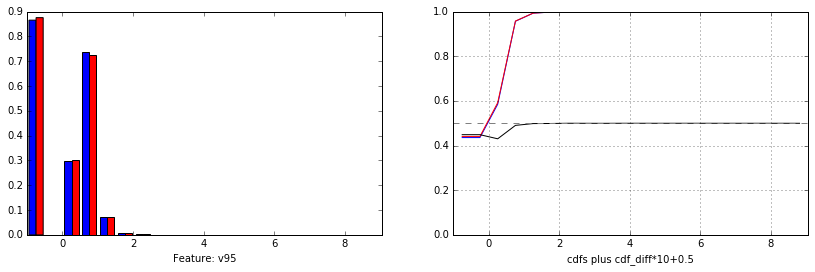

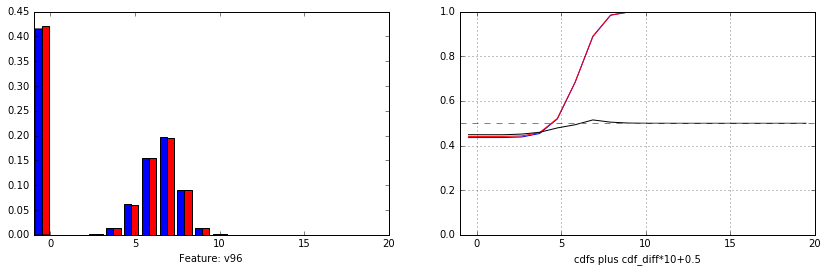

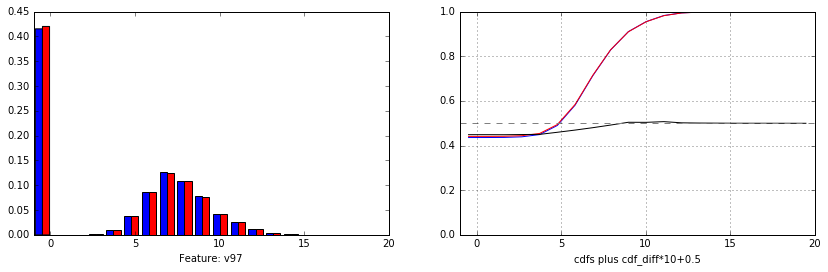

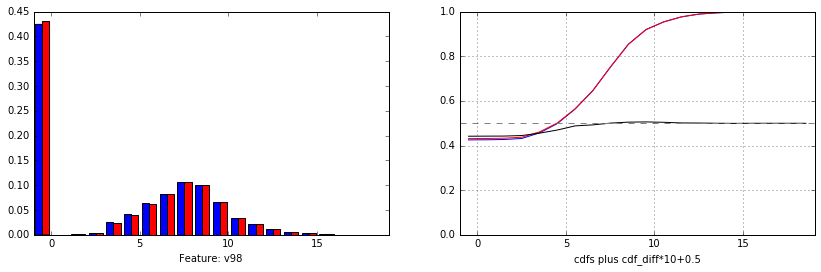

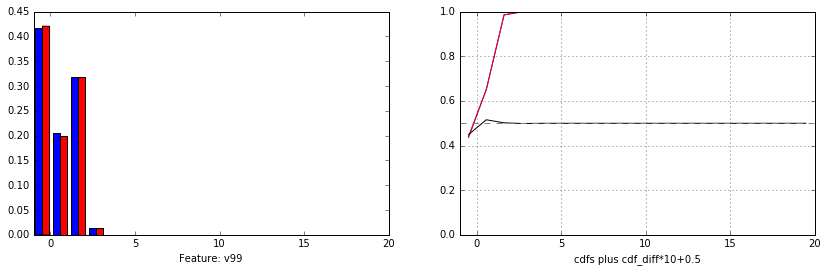

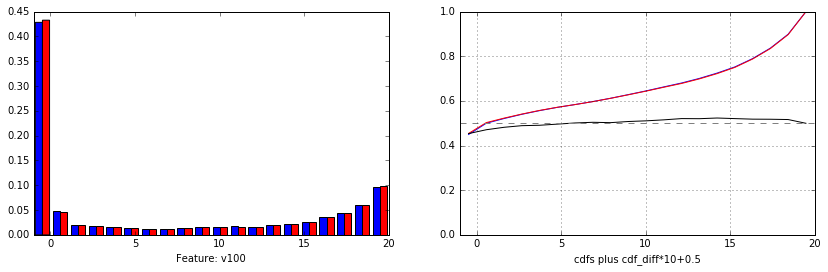

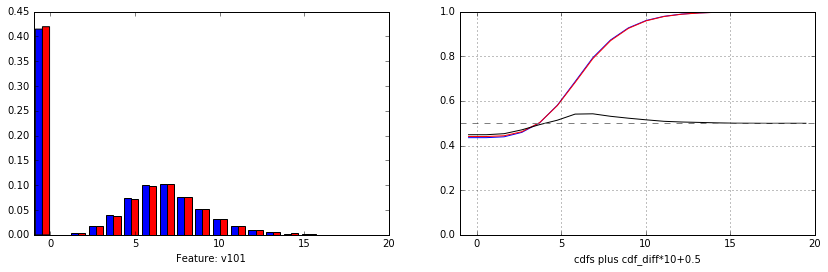

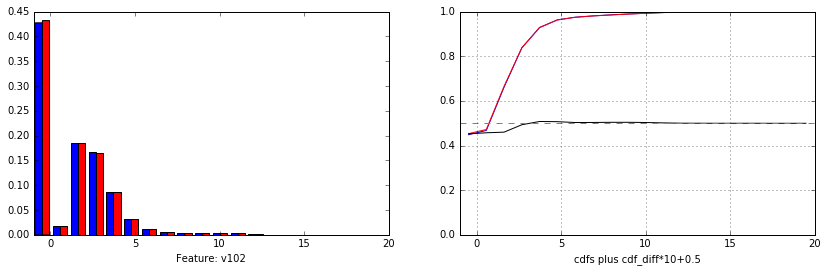

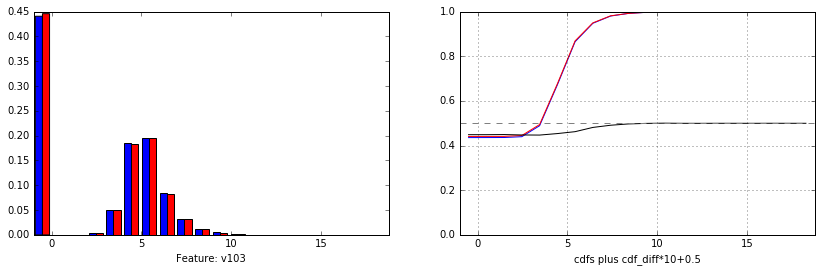

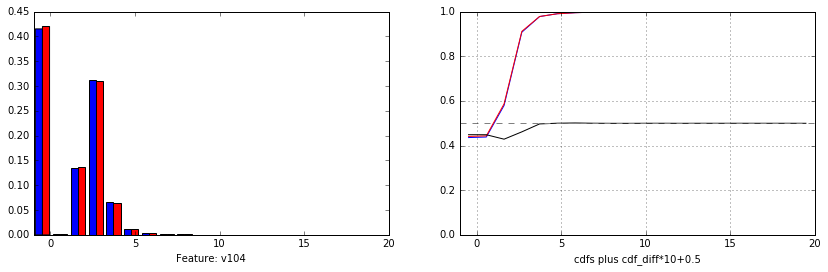

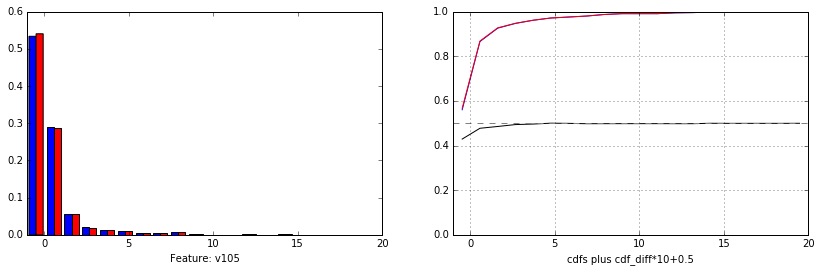

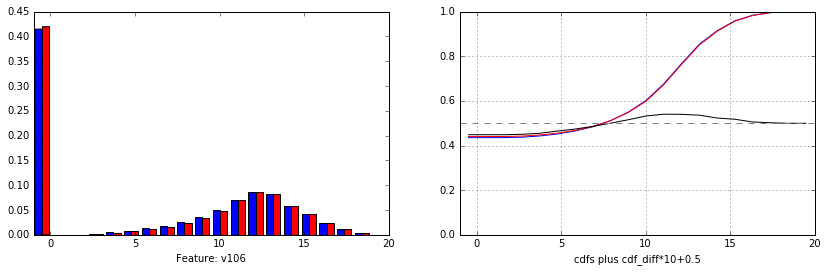

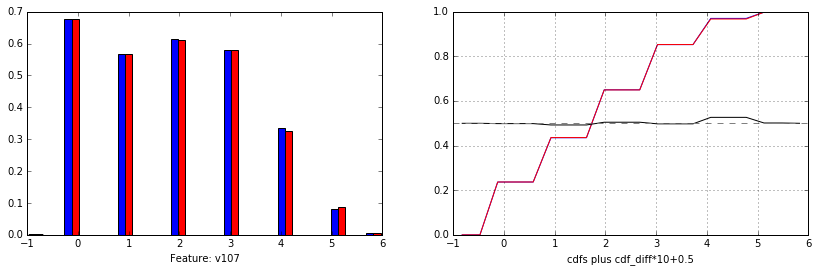

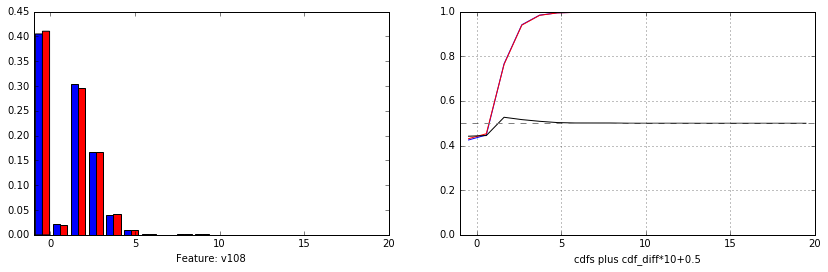

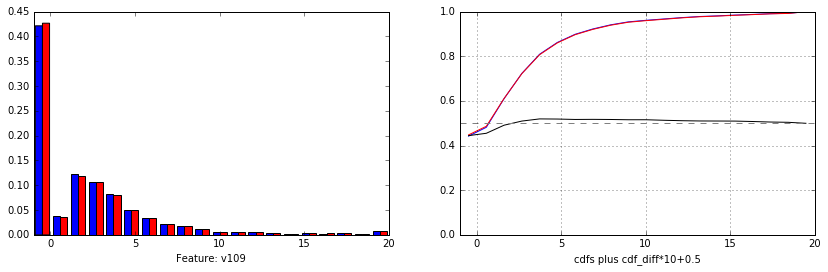

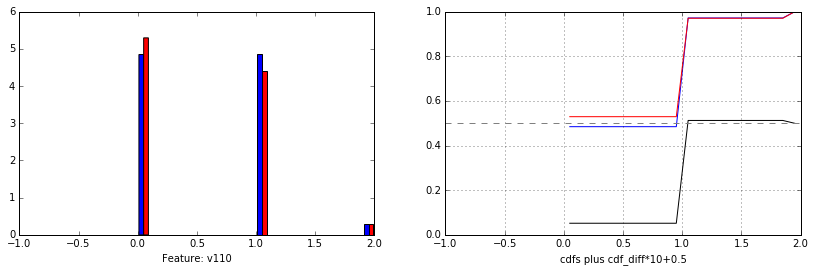

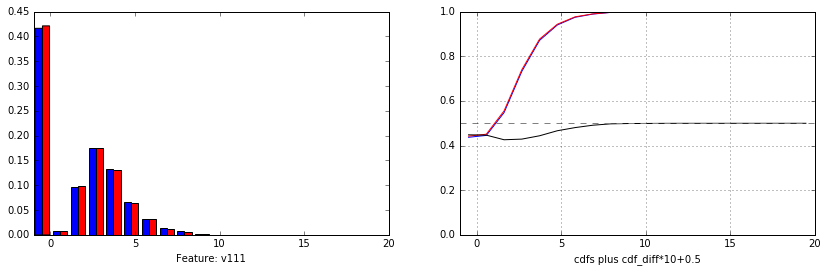

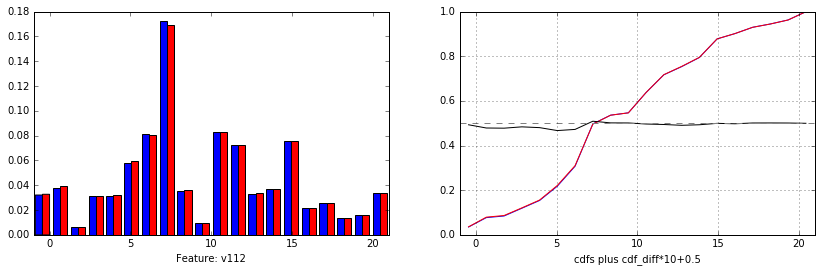

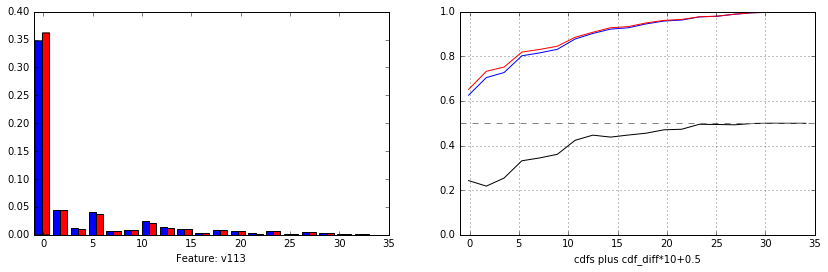

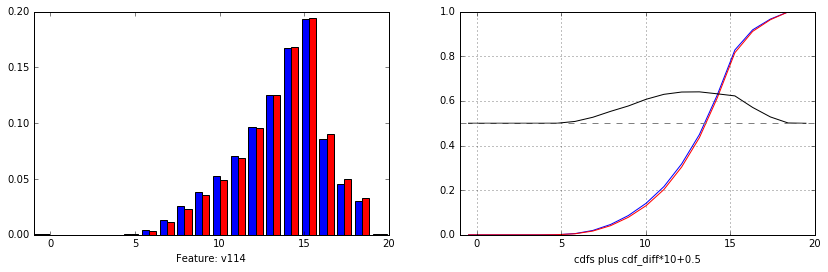

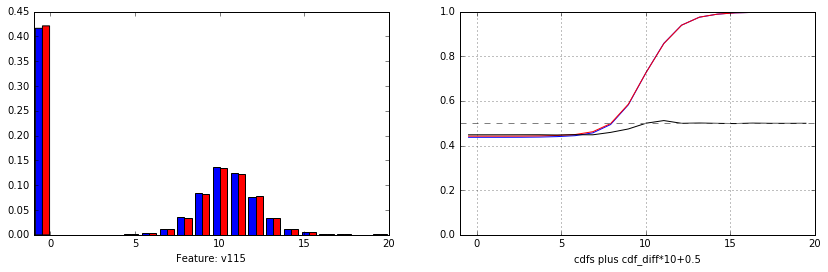

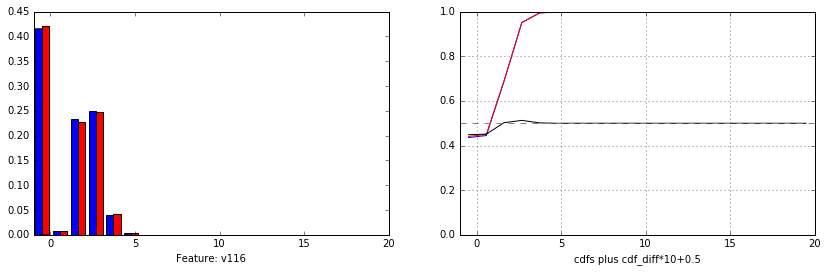

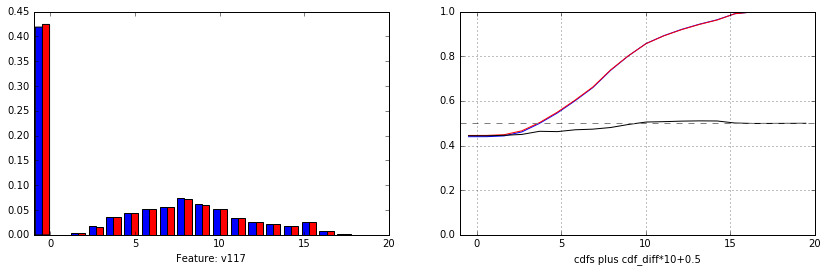

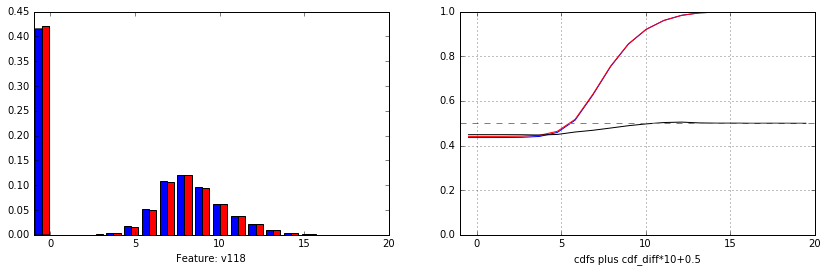

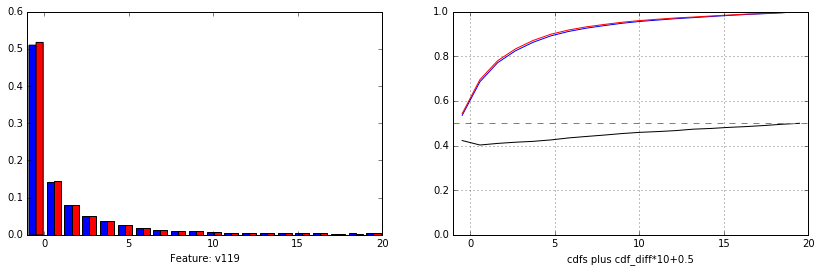

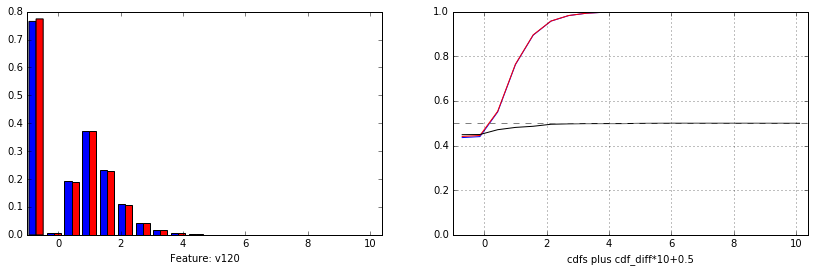

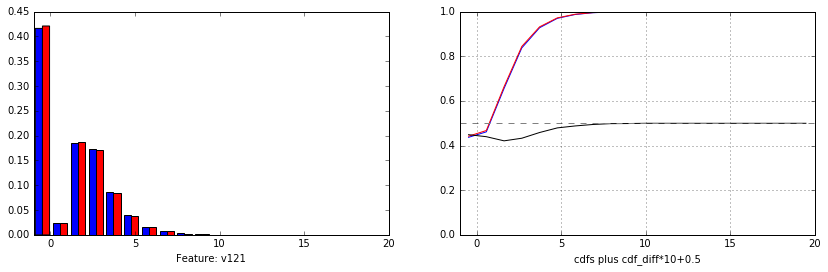

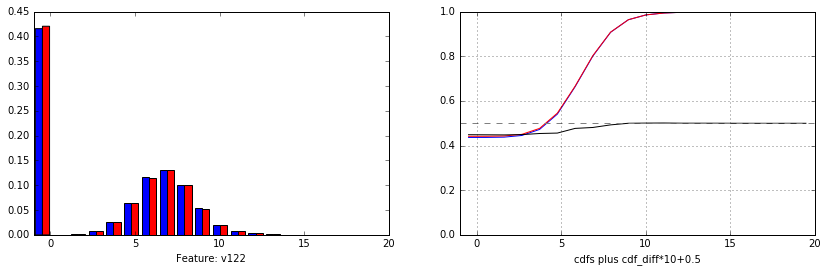

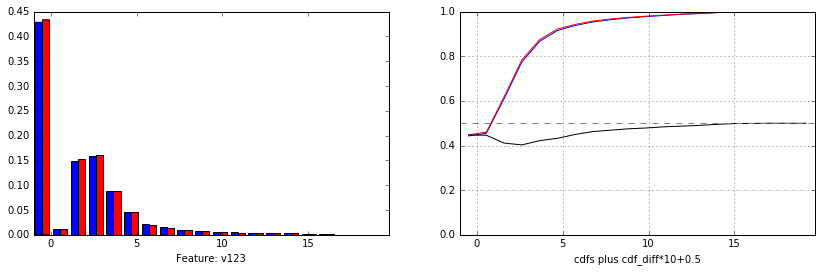

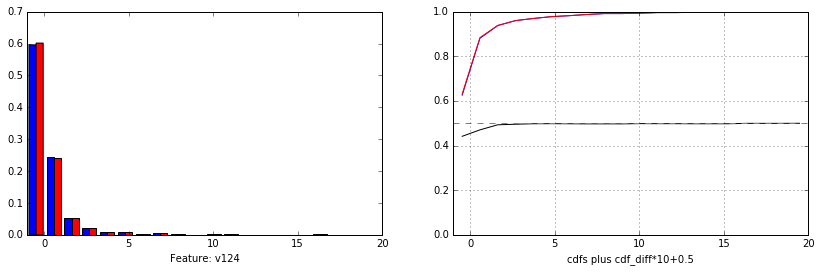

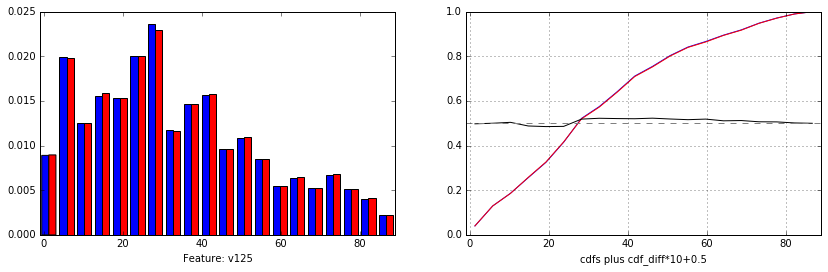

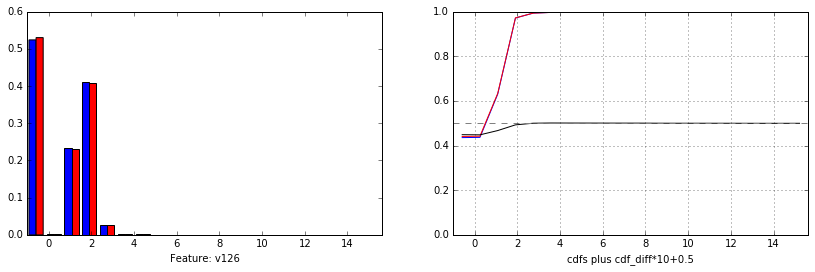

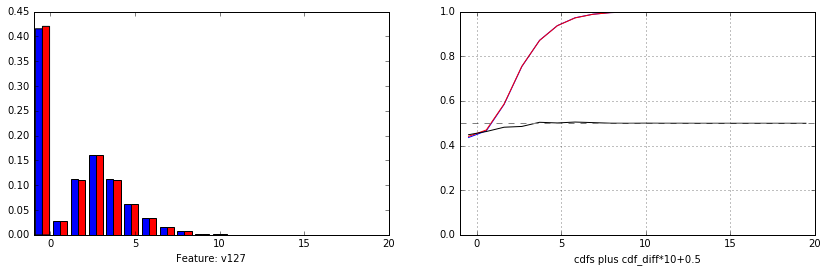

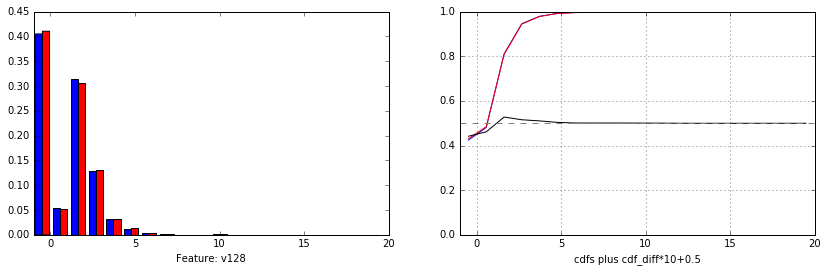

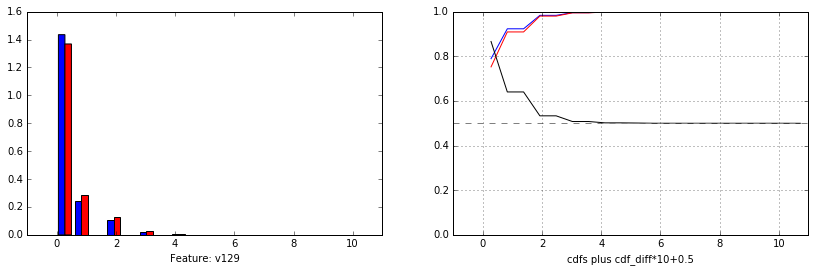

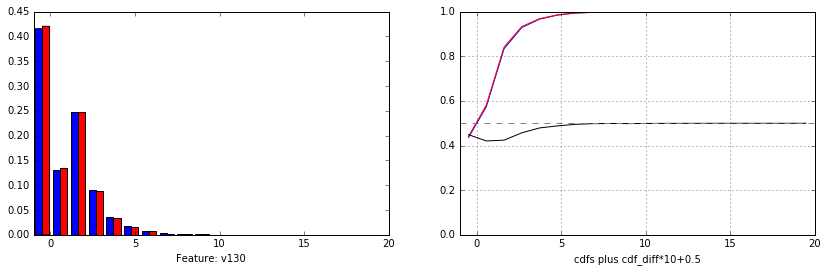

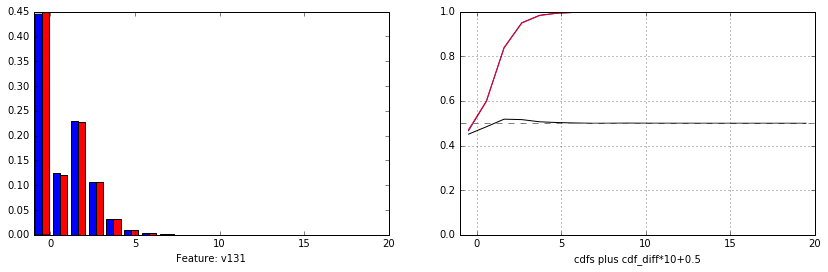

In [16]:
plt.rcParams['figure.max_open_warning']=300
nbins=20
for c in  featurenames:
    if train[c].dtype != 'object' and c != 'target':
        if c=='v22':
            hbins = 100
        else:
            hbins = nbins
        fig=plt.figure(figsize=(14,4))
        ax1 = fig.add_subplot(1,2,1) 
        
        dataset1 = train[c][~np.isnan(train[c])]
        dataset2 = train[c][~np.isnan(train[c]) & train.target]
        
        # left plot
        hd = ax1.hist((dataset1, dataset2), bins=hbins, histtype='bar',normed=True,
                        color=["blue", "red"],label=['all','target=1'])
        ax1.set_xlabel('Feature: '+c)
        ax1.set_xlim((-1,max(train[c])))
        
        binwidth = hd[1][1]-hd[1][0]
        midpts = (hd[1][:-1]+hd[1][1:])/2
        cdf_all= np.cumsum(hd[0][0])*binwidth
        cdf_ones = np.cumsum(hd[0][1])*binwidth

        # right plot
        ax2 = fig.add_subplot(1,2,2) 
        ax2.set_ylim((0,1))
        ax2.set_xlim((0,nbins))
        ax2.plot(midpts,cdf_all,color='b')
        ax2.plot(midpts,cdf_ones,color='r')
        ax2.plot(midpts,0.5+10*(cdf_all-cdf_ones),color='k')
        ax2.grid()
        ax2.set_xlim((-1,max(train[c])))
        ax2.set_xlabel('cdfs plus cdf_diff*10+0.5')
        ax2.axhline(0.5,color='gray',linestyle='--')